In [2]:
import numpy as np

#Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2 #Number of outputs

In [3]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) #Keeping dims true ensures that it only adds particular axis wise
    return ans


In [4]:
a = np.array([[10,10],[10,20]])

a_ = softmax(a)
print(a_)

[[5.00000000e-01 5.00000000e-01]
 [4.53978687e-05 9.99954602e-01]]


In [23]:
class Neural:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {} #Dictionary containing all weights and biases
        
        #Taking randdom values for weights and biases in each layer
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0]) #Creating a matrix of weights so that all neurons in previous layer 
        #can multiply column wise with matrix to give one neuron in next layer
        #We need number of rows = number of neurons in previous layer
        #Number of columns = number of neurons in next layer
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None #To store the values
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3'] #From model dictionary getting values of W1.W2,W3
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3'] #From model dictionary getting values of b1.b2,b3
        
        z1 = np.dot(x,W1) + b1 #Doing the required dot product and adding bias
        a1 = np.tanh(z1) #Passing the tanh which gives value between -1 and 1
        #First hidden layer done
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        #Second hidden layer done
        
        z3 = np.dot(a2,W3) + b3
        #Output
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_) #The values of a1, a2, and predicted y ie y_ is stored to be used during backpropagation
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3'] #Calling all the values of weights
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3'] #Calling all the values of biases
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y # #Finding difference of predicted and real
        dw3 = np.dot(a2.T,delta3) #Computing value of dw
        db3 = np.sum(delta3,axis=0) #Computing value of bias
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T) #Derivative of tanh * dot product of W and delta of forward layer
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1 #Updating value of the weight
        self.model['b1']  -= learning_rate*db1 #Updating value of the bias
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1) #taking max of each column in output, so we get predicted output for our given example
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3'] #Returning the final weights
        a1,a2,y_ = self.activation_outputs #Returning the answers for each layer and output
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [17]:

def loss(y_oht,p): #Will put original value in the form of hot vector and predicted
    l = -np.mean(y_oht*np.log(p)) #Putting formula for k
    return l

def one_hot(y,depth):
    
    m = y.shape[0] #Number of rows
    y_oht = np.zeros((m,depth)) #Rows = number of examples, and depth = number of classes
    y_oht[np.arange(m),y] = 1 #In a particular row, it will put one where label gives the answer
    return y_oht

In [18]:
from sklearn.datasets import make_circles #Downloading a random dataset
import matplotlib.pyplot as plt

In [10]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


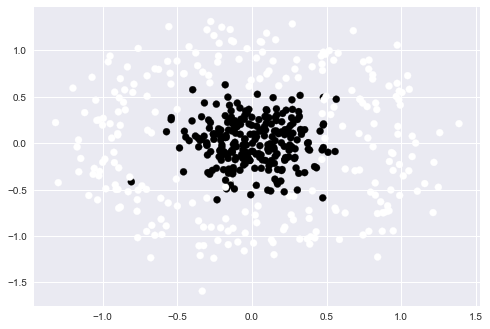

In [11]:

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [24]:
model  = Neural(input_size=2,layers=[8,4],output_size=2)
#Was throwing exception because I had put only one underscore before and after init


In [30]:
def train(X,Y,model,epochs,learning_rate=0.001):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for i in range(epochs):
        
        Y_ = model.forward(X) #Computing value going forward
        l = loss(Y_OHT,Y_) #Computing the loss
        training_loss.append(l) #Then the loss is loaded
        model.backward(X,Y_OHT,learning_rate) #The model goes back and adjusts weight according to the loss
        
        if(i%10==0):
            print("Epoch %d Loss %.4f"%(i,l))
            
    
    return training_loss

In [33]:
losses= train(X,Y,model,1000)

Epoch 0 Loss 0.0364
Epoch 10 Loss 0.0364
Epoch 20 Loss 0.0364
Epoch 30 Loss 0.0363
Epoch 40 Loss 0.0363
Epoch 50 Loss 0.0363
Epoch 60 Loss 0.0362
Epoch 70 Loss 0.0362
Epoch 80 Loss 0.0362
Epoch 90 Loss 0.0403
Epoch 100 Loss 0.0459
Epoch 110 Loss 0.0390
Epoch 120 Loss 0.0381
Epoch 130 Loss 0.0386
Epoch 140 Loss 0.0388
Epoch 150 Loss 0.0385
Epoch 160 Loss 0.0382
Epoch 170 Loss 0.0380
Epoch 180 Loss 0.0380
Epoch 190 Loss 0.0379
Epoch 200 Loss 0.0378
Epoch 210 Loss 0.0378
Epoch 220 Loss 0.0377
Epoch 230 Loss 0.0377
Epoch 240 Loss 0.0376
Epoch 250 Loss 0.0376
Epoch 260 Loss 0.0375
Epoch 270 Loss 0.0375
Epoch 280 Loss 0.0374
Epoch 290 Loss 0.0374
Epoch 300 Loss 0.0374
Epoch 310 Loss 0.0373
Epoch 320 Loss 0.0373
Epoch 330 Loss 0.0372
Epoch 340 Loss 0.0372
Epoch 350 Loss 0.0372
Epoch 360 Loss 0.0372
Epoch 370 Loss 0.0371
Epoch 380 Loss 0.0371
Epoch 390 Loss 0.0371
Epoch 400 Loss 0.0370
Epoch 410 Loss 0.0370
Epoch 420 Loss 0.0370
Epoch 430 Loss 0.0369
Epoch 440 Loss 0.0369
Epoch 450 Loss 0.0369

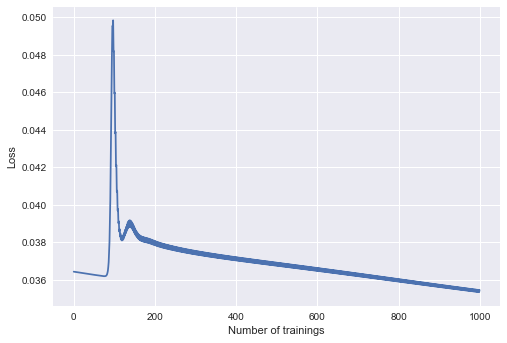

In [34]:
plt.plot(losses)
plt.xlabel("Number of trainings")
plt.ylabel("Loss")
plt.show()

In [35]:
outputs = model.predict(X)
accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(accuracy*100))

Training Accuracy 96.8000


In [37]:
#It will do a great job in classifying XOR too which is impossible for simple classfiers